####**... Meanwhile on 15 Dec 2020.**
---
###<div align="left">I have been quite familiar how **softmax** and **negative log likelihood** function works in general. But why below Crossentropy function from *pytorch.org* gave me headache? </div>
 
> ##### <div align="right">*author : alvinwatner*</div>

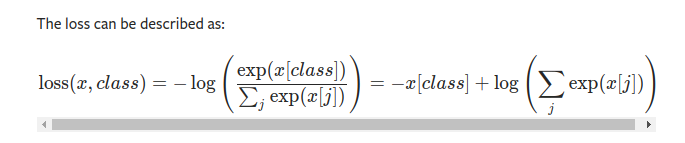
https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

### If you feel the same way, then take a look how i tried to boil down above equation.
----

#### Based on my **perspective**, that above equation is not being consistent, since it seems like they try to combine the math style with the programming style. But well, in terms of code documentation it's not necessary to stick on which particular style as long as it's still readable and maintain the actual computation. 

<br /> 
<br /> 

#### Anyway moving on, so actually that just softmax & negative natural log likelihood. How is that?
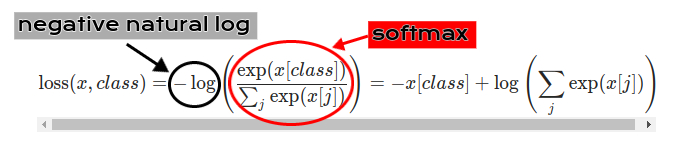

 
<br /> 

###...Now let's try to describe it more mathy. 
 
 
---

###### <div align="center">---- *Note : I use the bold letter to represent a **vector** and non-bold as **scalar**. ----*</div>
---

<br /> 

#### First of all, let's have a look how softmax function looks like in general,

> $$S(\mathbf{x}) = \mathbf{b}$$

#### The above function $S$ take an input vector $\mathbf{x}$ and output another vector $\mathbf{b}$.
> $$\mathbf{b} = [ b_{1}, b_{2}, \dots, b_{n}]$$
### Below is the calculation for each $b_i$
> $$b_i = \displaystyle \frac{e^x_i}{\sum_{i=1}^{n} e^x_j}$$
##### Since we make use of the magical  euler number $e$, which is a mathematical constant approximately equal to 2.71828, it turns out that the sum of $$b_{1}, b_{2}, \dots, b_{n} = 1.0$$
### Let the target class vector denoted as $\mathbf{c}$.
> $$\mathbf{c} = [ c_{1}, c_{2}, \dots, c_{n}]$$
### Let the  *$b_i$ that correspond to the target class $c_i$ equal to $b_c$* .
#### Then we attempt to maximize the $b_c$ by minimizing the negative natural log of $b_c$ shown as below
> ### $$loss( \mathbf{b} , \mathbf{c}) =  - ln(b_{c})$$ 







### Allright... Let's see if it is true...

In [1]:
_input_vector_x = [0,2,0,1]
_target_class_c = [2]

In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
 
x_torchTensor = Variable(torch.FloatTensor(_input_vector_x)).view(1, -1)
t_torchTensor = Variable(torch.LongTensor(_target_class_c))
print(f"x_torchTensor = {x_torchTensor}")
print(f"t_torchTensor = {t_torchTensor}")

x_torchTensor = tensor([[0., 2., 0., 1.]])
t_torchTensor = tensor([2])


In [3]:
# |Pytorch| Cross Entropy Loss (Version)
criterion = nn.CrossEntropyLoss()

torchC_Loss                        = criterion(x_torchTensor, t_torchTensor)
print(f"Pytorch Cross Entropy Loss = {torchC_Loss}")

Pytorch Cross Entropy Loss = 2.49381160736084


In [4]:
# |Pytorch| Negative Log Likelihood and Softmax (Version)
fsoftmax_ = nn.Softmax(dim=1)

b_  = fsoftmax_(x_torchTensor)
bt_ = b_[0, _target_class_c] # Pull out the value of the index of _target_class_ in b_
print(f"Softmax of x_torchTensor                                    = {b_}")
print(f"The index of _target_class_ from the softmax probability b_ = {bt_}")


torchNegLog                         = -1 * torch.log(bt_)
print("")
print(f"Pytorch Negative log of bt_ = {torchNegLog}")

Softmax of x_torchTensor                                    = tensor([[0.0826, 0.6103, 0.0826, 0.2245]])
The index of _target_class_ from the softmax probability b_ = tensor([0.0826])

Pytorch Negative log of bt_ = tensor([2.4938])


In [5]:
# No Torch, Let's use Numpy 
# |Numpy| Negative Log Likelihood and Softmax (Version)
import numpy as np 
 
x_npTensor = np.array(_input_vector_x)
t_npTensor = np.array(_target_class_c)
 
def softmax_(x):
  b_            = np.array([])
  denominator   = np.array([])
  
  ''' ∑ e^x_j '''
  for x_j in x:
    denominator = np.append(denominator, np.exp(x_j))  
  denominator = np.sum(denominator)
 
  ''' softmax_vector (denoted as b_)  = [ e^x_i / ∑ e^x_j ]'''
  for numerator in x:
    b_ = np.append(b_, np.exp(numerator)/denominator)
    
  return b_
 
def neglogLoss(b_, target_class):
  negLog_vector = np.array([])
  
  for t in target_class:    
    negLog = -1 * np.log(b_[t])
    negLog_vector = np.append(negLog_vector, negLog)
 
  return negLog_vector
 
b_  = softmax_(x_npTensor)
bt_ = neglogLoss(b_, t_npTensor)
print(f"Numpy Negative log of bt_ = {bt_}")

Numpy Negative log of bt_ = [2.49381171]


In [6]:
# No Torch, Let's use Numpy 
# |Pytorch| CrossEntropy Loss (Version)
 
def crossEntropyLoss(x, target_class):
  b_   = softmax_(x)
  bt_  = neglogLoss(b_, target_class)
 
  return bt_
 
npC_Loss                   = crossEntropyLoss(x_npTensor, t_npTensor)
print(f"Numpy Cross Entropy Loss = {npC_Loss}")

Numpy Cross Entropy Loss = [2.49381171]
